Лабораторная работа №1 "Системы ОДУ". Манджиев Улюмджи. Б01-204

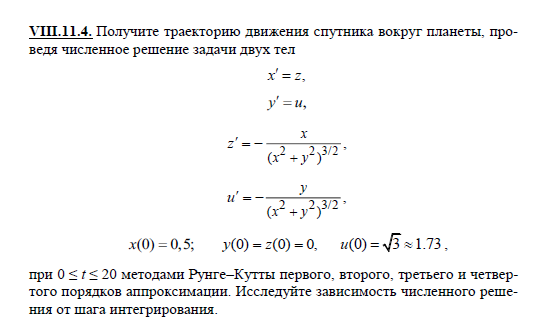

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def rhs(x, y):
    r = np.sqrt(x**2 + y**2)
    return -x / r**3, -y / r**3

Параметры

In [84]:
t0, tf = 0.0, 20.0
h = 0.0001
n = int((tf - t0) / h) + 1
t = np.linspace(t0, tf, n)

Инициализация

In [86]:
x = np.zeros(n)
y = np.zeros(n)
z = np.zeros(n)  # x' = z
u = np.zeros(n)  # y' = u

# Начальные условия
x[0], y[0], z[0], u[0] = 0.5, 0.0, 0.0, np.sqrt(3)

1. Явные методы Рунге-Кутты (1-4 порядков)

In [88]:
def euler():  
    for i in range(n-1):
        dz, du = rhs(x[i], y[i])
        x[i+1] = x[i] + h * z[i]
        y[i+1] = y[i] + h * u[i]
        z[i+1] = z[i] + h * dz
        u[i+1] = u[i] + h * du
    return x.copy(), y.copy()

def rk2():  
    x_, y_, z_, u_ = x.copy(), y.copy(), z.copy(), u.copy()
    for i in range(n-1):
        k1_z, k1_u = rhs(x_[i], y_[i])
        k1_x = z_[i]
        k1_y = u_[i]
        
        k2_z, k2_u = rhs(x_[i] + h*k1_x, y_[i] + h*k1_y)
        k2_x = z_[i] + h*k1_z
        k2_y = u_[i] + h*k1_u
        
        x_[i+1] = x_[i] + h/2*(k1_x + k2_x)
        y_[i+1] = y_[i] + h/2*(k1_y + k2_y)
        z_[i+1] = z_[i] + h/2*(k1_z + k2_z)
        u_[i+1] = u_[i] + h/2*(k1_u + k2_u)
    return x_, y_

def rk3():  
    x_, y_, z_, u_ = x.copy(), y.copy(), z.copy(), u.copy()
    for i in range(n-1):
        k1_z, k1_u = rhs(x_[i], y_[i])
        k1_x = z_[i]
        k1_y = u_[i]
        
        k2_z, k2_u = rhs(x_[i] + h/2*k1_x, y_[i] + h/2*k1_y)
        k2_x = z_[i] + h/2*k1_z
        k2_y = u_[i] + h/2*k1_u
        
        k3_z, k3_u = rhs(x_[i] + h*k2_x, y_[i] + h*k2_y)
        k3_x = z_[i] + h*k2_z
        k3_y = u_[i] + h*k2_u
        
        x_[i+1] = x_[i] + h*(k1_x + 4*k2_x + k3_x)/6
        y_[i+1] = y_[i] + h*(k1_y + 4*k2_y + k3_y)/6
        z_[i+1] = z_[i] + h*(k1_z + 4*k2_z + k3_z)/6
        u_[i+1] = u_[i] + h*(k1_u + 4*k2_u + k3_u)/6
    return x_, y_

def rk4():
    x_, y_, z_, u_ = x.copy(), y.copy(), z.copy(), u.copy()
    for i in range(n-1):
        k1_z, k1_u = rhs(x_[i], y_[i])
        k1_x = z_[i]
        k1_y = u_[i]
        
        k2_z, k2_u = rhs(x_[i] + 0.5*h*k1_x, y_[i] + 0.5*h*k1_y)
        k2_x = z_[i] + 0.5*h*k1_z
        k2_y = u_[i] + 0.5*h*k1_u
        
        k3_z, k3_u = rhs(x_[i] + 0.5*h*k2_x, y_[i] + 0.5*h*k2_y)
        k3_x = z_[i] + 0.5*h*k2_z
        k3_y = u_[i] + 0.5*h*k2_u
        
        k4_z, k4_u = rhs(x_[i] + h*k3_x, y_[i] + h*k3_y)
        k4_x = z_[i] + h*k3_z
        k4_y = u_[i] + h*k3_u
        
        x_[i+1] = x_[i] + h/6*(k1_x + 2*k2_x + 2*k3_x + k4_x)
        y_[i+1] = y_[i] + h/6*(k1_y + 2*k2_y + 2*k3_y + k4_y)
        z_[i+1] = z_[i] + h/6*(k1_z + 2*k2_z + 2*k3_z + k4_z)
        u_[i+1] = u_[i] + h/6*(k1_u + 2*k2_u + 2*k3_u + k4_u)
    return x_, y_


2. Методы Адамса-Башфорта (2-4 порядков)

In [90]:
def adams_bashforth(m_order): 
    x_, y_, z_, u_ = x.copy(), y.copy(), z.copy(), u.copy()
    
    # Разгонный участок
    rk_steps = max(m_order-1, 1)
    for i in range(rk_steps):
        k1_z, k1_u = rhs(x_[i], y_[i])
        k1_x = z_[i]
        k1_y = u_[i]
        
        k2_z, k2_u = rhs(x_[i] + 0.5*h*k1_x, y_[i] + 0.5*h*k1_y)
        k2_x = z_[i] + 0.5*h*k1_z
        k2_y = u_[i] + 0.5*h*k1_u
        
        k3_z, k3_u = rhs(x_[i] + 0.5*h*k2_x, y_[i] + 0.5*h*k2_y)
        k3_x = z_[i] + 0.5*h*k2_z
        k3_y = u_[i] + 0.5*h*k2_u
        
        k4_z, k4_u = rhs(x_[i] + h*k3_x, y_[i] + h*k3_y)
        k4_x = z_[i] + h*k3_z
        k4_y = u_[i] + h*k3_u
        
        x_[i+1] = x_[i] + h/6*(k1_x + 2*k2_x + 2*k3_x + k4_x)
        y_[i+1] = y_[i] + h/6*(k1_y + 2*k2_y + 2*k3_y + k4_y)
        z_[i+1] = z_[i] + h/6*(k1_z + 2*k2_z + 2*k3_z + k4_z)
        u_[i+1] = u_[i] + h/6*(k1_u + 2*k2_u + 2*k3_u + k4_u)
    
    for i in range(rk_steps, n-1):
        if m_order == 2:
            x_[i+1] = x_[i] + h/2*(3*z_[i] - z_[i-1])
            y_[i+1] = y_[i] + h/2*(3*u_[i] - u_[i-1])
        elif m_order == 3:
            x_[i+1] = x_[i] + h/12*(23*z_[i] - 16*z_[i-1] + 5*z_[i-2])
            y_[i+1] = y_[i] + h/12*(23*u_[i] - 16*u_[i-1] + 5*u_[i-2])
        elif m_order == 4:
            x_[i+1] = x_[i] + h/24*(55*z_[i] - 59*z_[i-1] + 37*z_[i-2] - 9*z_[i-3])
            y_[i+1] = y_[i] + h/24*(55*u_[i] - 59*u_[i-1] + 37*u_[i-2] - 9*u_[i-3])
        
        # Обновление z и u 
        dz, du = rhs(x_[i+1], y_[i+1])
        z_[i+1] = z_[i] + h*dz
        u_[i+1] = u_[i] + h*du
    
    return x_, y_


3. Метод FDB 2 порядка

In [92]:
def fdb(m_order):
    x_, y_, z_, u_ = x.copy(), y.copy(), z.copy(), u.copy()
    
    # Разгонный участок
    rk_steps = max(m_order-1, 1)
    for i in range(rk_steps):
        k1_z, k1_u = rhs(x_[i], y_[i])
        k1_x = z_[i]
        k1_y = u_[i]
        
        k2_z, k2_u = rhs(x_[i] + 0.5*h*k1_x, y_[i] + 0.5*h*k1_y)
        k2_x = z_[i] + 0.5*h*k1_z
        k2_y = u_[i] + 0.5*h*k1_u
        
        k3_z, k3_u = rhs(x_[i] + 0.5*h*k2_x, y_[i] + 0.5*h*k2_y)
        k3_x = z_[i] + 0.5*h*k2_z
        k3_y = u_[i] + 0.5*h*k2_u
        
        k4_z, k4_u = rhs(x_[i] + h*k3_x, y_[i] + h*k3_y)
        k4_x = z_[i] + h*k3_z
        k4_y = u_[i] + h*k3_u
        
        x_[i+1] = x_[i] + h/6*(k1_x + 2*k2_x + 2*k3_x + k4_x)
        y_[i+1] = y_[i] + h/6*(k1_y + 2*k2_y + 2*k3_y + k4_y)
        z_[i+1] = z_[i] + h/6*(k1_z + 2*k2_z + 2*k3_z + k4_z)
        u_[i+1] = u_[i] + h/6*(k1_u + 2*k2_u + 2*k3_u + k4_u)
    
    for i in range(rk_steps, n-1):
        if m_order == 2:
            x_[i+1] = x_[i-1] + 2*h * z_[i]
            y_[i+1] = y_[i-1] + 2*h * u_[i]
        # Обновление z и u
        dz, du = rhs(x_[i+1], y_[i+1])
        z_[i+1] = z_[i] + h*dz
        u_[i+1] = u_[i] + h*du
    
    return x_, y_

4. Решение задачи

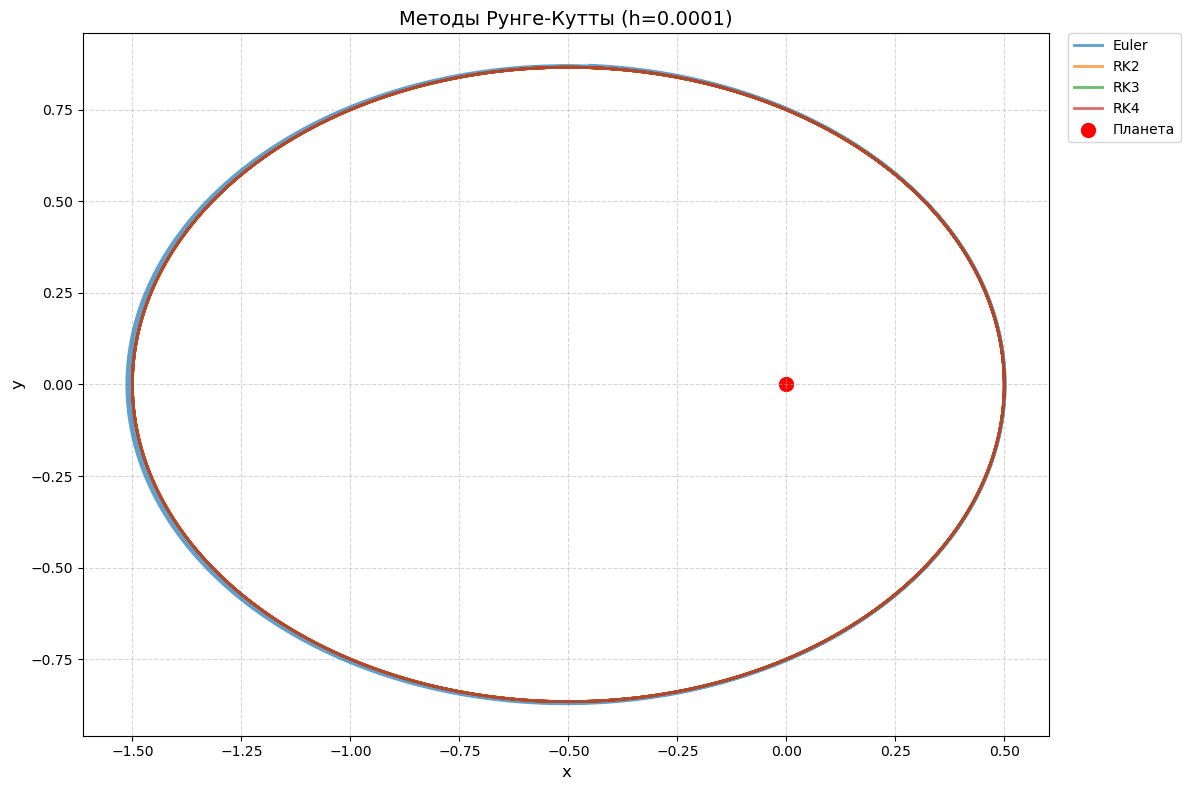

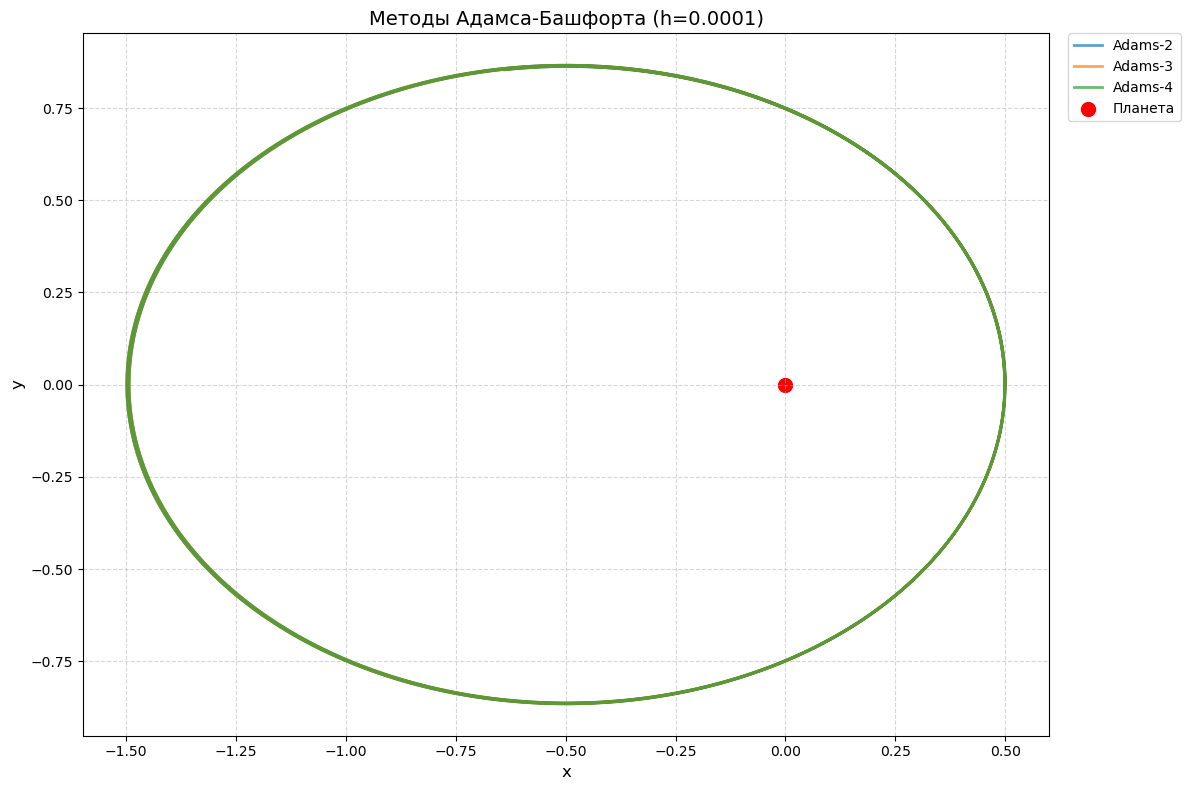

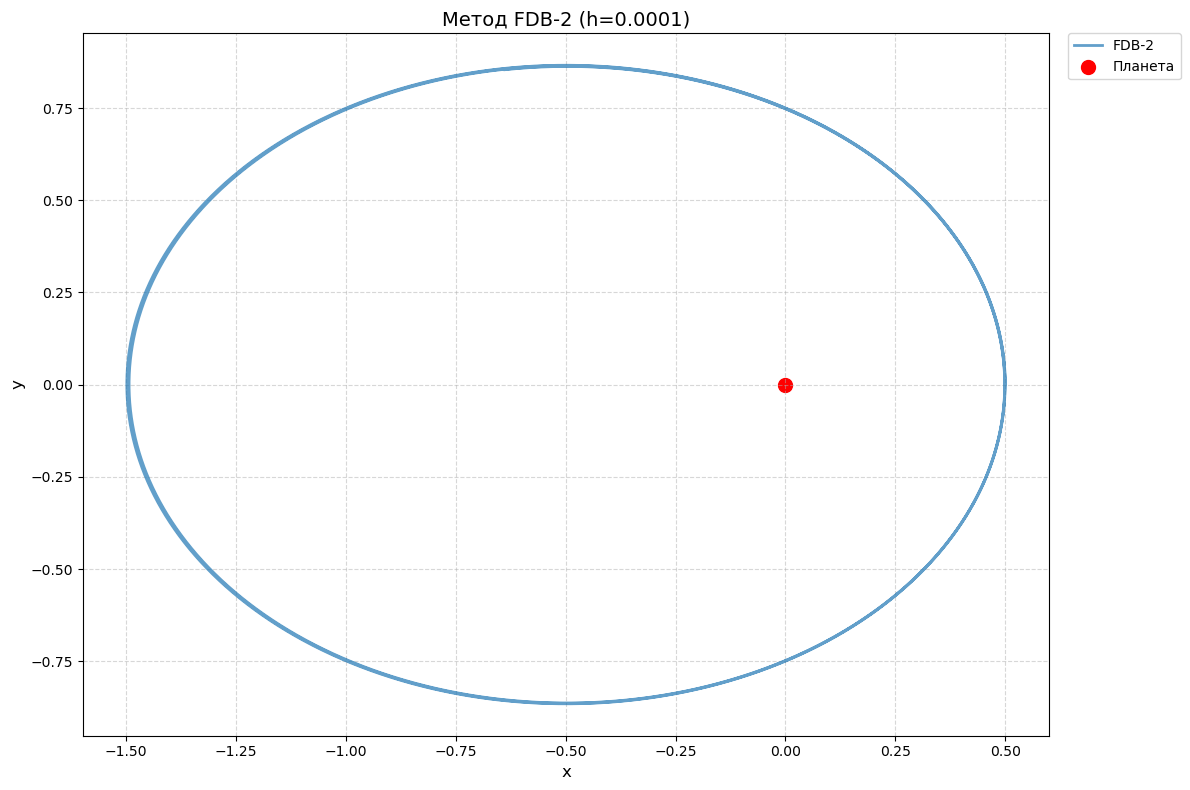

In [94]:
methods = {
    'Euler': euler(),
    'RK2': rk2(),
    'RK3': rk3(),
    'RK4': rk4(),
    'Adams-2': adams_bashforth(2),
    'Adams-3': adams_bashforth(3),
    'Adams-4': adams_bashforth(4),
    'FDB-2': fdb(2)
}

families = {
    'Методы Рунге-Кутты': ['Euler', 'RK2', 'RK3', 'RK4'],
    'Методы Адамса-Башфорта': ['Adams-2', 'Adams-3', 'Adams-4'],
    'Метод FDB-2': ['FDB-2']
}

for family_name, method_names in families.items():
    plt.figure(figsize=(12, 8))
    for name in method_names:
        x_vals, y_vals = methods[name]
        plt.plot(x_vals, y_vals, label=name, alpha=0.7, linewidth=2)
    plt.scatter([0], [0], c='red', s=100, label='Планета', marker='o')
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title(f'{family_name} (h={h})', fontsize=14)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()